In [735]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold

from sklearn import metrics
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.holtwinters import SimpleExpSmoothing  # SES
from statsmodels.tsa.holtwinters import Holt  # holts exponential  smoothening
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [736]:
data = pd.read_excel(r"C:\Users\91863\Downloads\CocaCola_Sales_Rawdata (1).xlsx")

In [737]:
data

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [738]:
data.shape

(42, 2)

In [739]:
data.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [740]:
data.dtypes

Quarter     object
Sales      float64
dtype: object

In [741]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [742]:
data[data.duplicated()].shape

(0, 2)

In [743]:
data.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


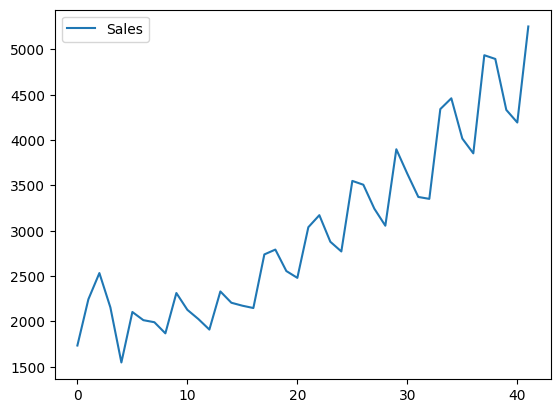

In [744]:
# line plot of time series
from matplotlib import pyplot
data.plot()
pyplot.show()

array([[<Axes: title={'center': 'Sales'}>]], dtype=object)

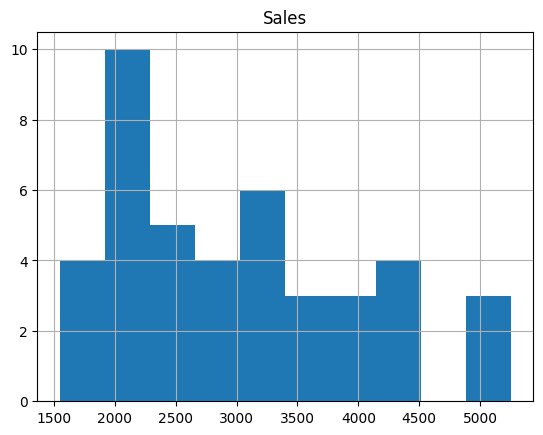

In [745]:
data.hist()

<Axes: ylabel='Density'>

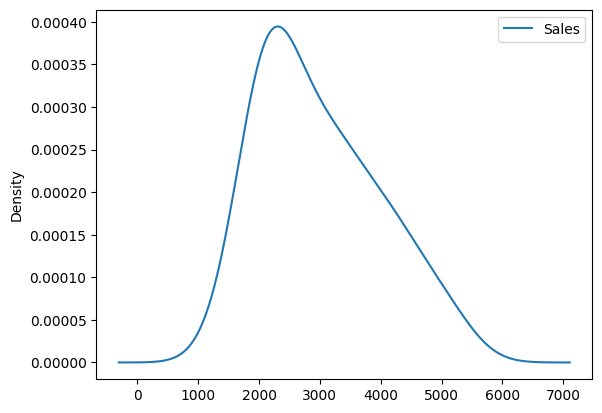

In [746]:
data.plot(kind="kde")

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

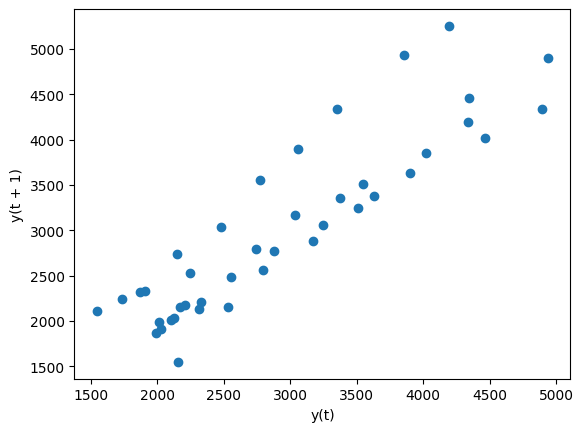

In [747]:
# lag plot
from pandas.plotting import lag_plot
lag_plot(data["Sales"])

In [748]:
data.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [749]:
data["Quarter_year"] = data["Quarter"].str.split("_").apply(lambda x: " 19".join(x[:]))
# way to convert quarterly periods to datetime 
data.head(10)

,Quarter,Sales,Quarter_year
0,Q1_86,1734.827000,Q1 1986
1,Q2_86,2244.960999,Q2 1986
2,Q3_86,2533.804993,Q3 1986
3,Q4_86,2154.962997,Q4 1986
4,Q1_87,1547.818996,Q1 1987
5,Q2_87,2104.411995,Q2 1987
6,Q3_87,2014.362999,Q3 1987
7,Q4_87,1991.746998,Q4 1987
8,Q1_88,1869.049999,Q1 1988
9,Q2_88,2313.631996,Q2 1988


In [750]:
# Converting into datetime formate as the index was not in correct formate.
data['Date'] = (pd.to_datetime(data['Quarter_year'].str.split(' ').apply(lambda x: ''.join(x[::-1])),dayfirst=True))
# extracting quarter, year from the quarter  column using date functions froooom pandas

data["year"] =  data.Date.dt.strftime("%Y") # year extraction

In [751]:
data

,Quarter,Sales,Quarter_year,Date,year
0,Q1_86,1734.827000,Q1 1986,1986-01-01,1986
1,Q2_86,2244.960999,Q2 1986,1986-04-01,1986
2,Q3_86,2533.804993,Q3 1986,1986-07-01,1986
3,Q4_86,2154.962997,Q4 1986,1986-10-01,1986
4,Q1_87,1547.818996,Q1 1987,1987-01-01,1987
5,Q2_87,2104.411995,Q2 1987,1987-04-01,1987
6,Q3_87,2014.362999,Q3 1987,1987-07-01,1987
7,Q4_87,1991.746998,Q4 1987,1987-10-01,1987
8,Q1_88,1869.049999,Q1 1988,1988-01-01,1988
9,Q2_88,2313.631996,Q2 1988,1988-04-01,1988


In [752]:
# extracting quarters

data["Quarters"] = 0
for i in range(42):
    n = data["Quarter"][i]
    data["Quarters"][i] = n[:2]

data.head()

C:\Users\91863\AppData\Local\Temp\ipykernel_17948\424400558.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Quarters"][i] = n[:2]


,Quarter,Sales,Quarter_year,Date,year,Quarters
0,Q1_86,1734.827000,Q1 1986,1986-01-01,1986,Q1
1,Q2_86,2244.960999,Q2 1986,1986-04-01,1986,Q2
2,Q3_86,2533.804993,Q3 1986,1986-07-01,1986,Q3
3,Q4_86,2154.962997,Q4 1986,1986-10-01,1986,Q4
4,Q1_87,1547.818996,Q1 1987,1987-01-01,1987,Q1


In [753]:
data.drop(["Quarter","Quarter_year"],axis=1,inplace=True)

In [754]:
data.head()

,Sales,Date,year,Quarters
0,1734.827000,1986-01-01,1986,Q1
1,2244.960999,1986-04-01,1986,Q2
2,2533.804993,1986-07-01,1986,Q3
3,2154.962997,1986-10-01,1986,Q4
4,1547.818996,1987-01-01,1987,Q1


In [755]:
df= data.copy()

In [756]:
# dummies creation

data = pd.get_dummies(data=data,columns = ["Quarters"])

In [757]:
data.head()

,Sales,Date,year,Quarters_Q1,Quarters_Q2,Quarters_Q3,Quarters_Q4
0,1734.827000,1986-01-01,1986,1,0,0,0
1,2244.960999,1986-04-01,1986,0,1,0,0
2,2533.804993,1986-07-01,1986,0,0,1,0
3,2154.962997,1986-10-01,1986,0,0,0,1
4,1547.818996,1987-01-01,1987,1,0,0,0


In [758]:

# extracting day, weekday name, month  name, year from the date column using date funvtions froooom pandas

data["month"] = data.Date.dt.strftime( "%b") # month extraction
data["year"] =  data.Date.dt.strftime("%Y") # year extraction

In [759]:
data.set_index("Date",inplace=True)

In [760]:
data

,Sales,year,Quarters_Q1,Quarters_Q2,Quarters_Q3,Quarters_Q4,month
Date,,,,,,,
1986-01-01,1734.827000,1986,1,0,0,0,Jan
1986-04-01,2244.960999,1986,0,1,0,0,Apr
1986-07-01,2533.804993,1986,0,0,1,0,Jul
1986-10-01,2154.962997,1986,0,0,0,1,Oct
1987-01-01,1547.818996,1987,1,0,0,0,Jan
1987-04-01,2104.411995,1987,0,1,0,0,Apr
1987-07-01,2014.362999,1987,0,0,1,0,Jul
1987-10-01,1991.746998,1987,0,0,0,1,Oct
1988-01-01,1869.049999,1988,1,0,0,0,Jan


# data visualization

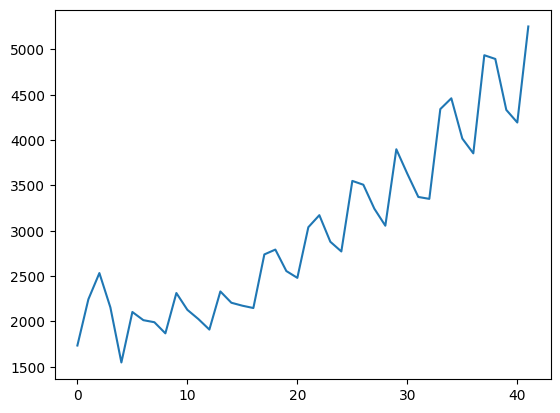

In [761]:
# line plot of time series
from matplotlib import pyplot
df["Sales"].plot()
pyplot.show()

<Axes: >

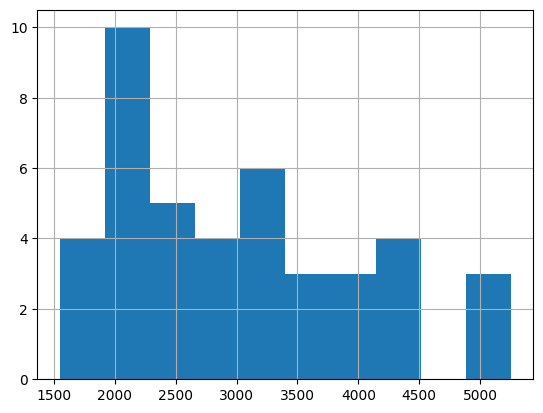

In [762]:
df["Sales"].hist()

<Axes: ylabel='Density'>

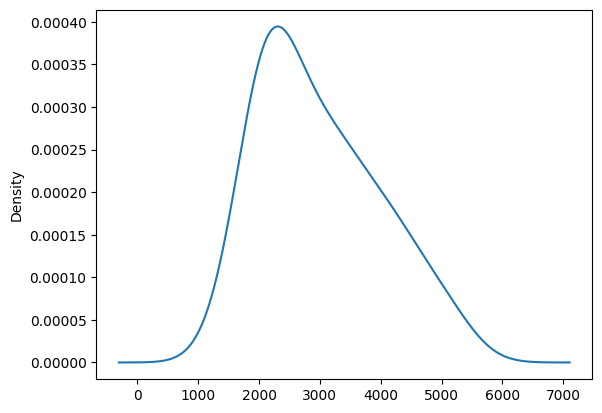

In [763]:
df["Sales"].plot(kind="kde")

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

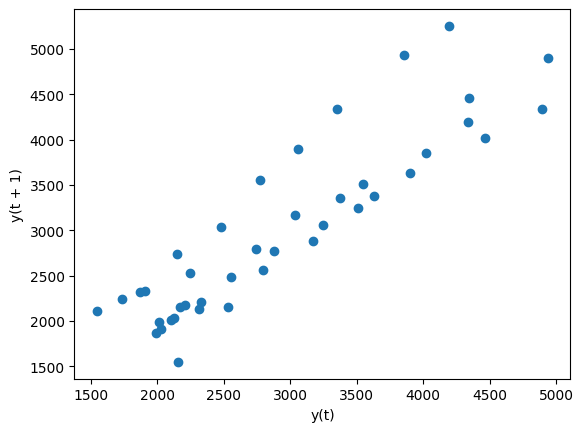

In [764]:
# lag plot
from pandas.plotting import lag_plot
lag_plot(df["Sales"])

In [765]:
df.set_index("Date",inplace=True)

In [766]:
# upsampling

upsampled = df.resample("M").mean()
print(upsampled.head(10))


                  Sales
Date                   
1986-01-31  1734.827000
1986-02-28          NaN
1986-03-31          NaN
1986-04-30  2244.960999
1986-05-31          NaN
1986-06-30          NaN
1986-07-31  2533.804993
1986-08-31          NaN
1986-09-30          NaN
1986-10-31  2154.962997


C:\Users\91863\AppData\Local\Temp\ipykernel_17948\3353056673.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  upsampled = df.resample("M").mean()


                  Sales
Date                   
1986-01-31  1734.827000
1986-02-28  1904.871666
1986-03-31  2074.916332
1986-04-30  2244.960999
1986-05-31  2341.242330
1986-06-30  2437.523661
1986-07-31  2533.804993
1986-08-31  2407.524328
1986-09-30  2281.243663
1986-10-31  2154.962997
1986-11-30  1952.581664
1986-12-31  1750.200330
1987-01-31  1547.818996
1987-02-28  1733.349996
1987-03-31  1918.880995


<Axes: xlabel='Date'>

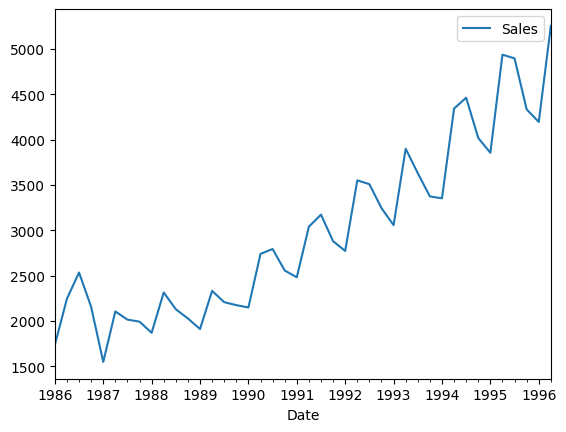

In [767]:
df = upsampled.interpolate(method="linear") ## interpolation was done for nan values which we get after doing upsampling by month
print(df.head(15))
df.plot()

C:\Users\91863\AppData\Local\Temp\ipykernel_17948\2466004901.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  square_root['Sales'] = np.sqrt(square_root.Sales)


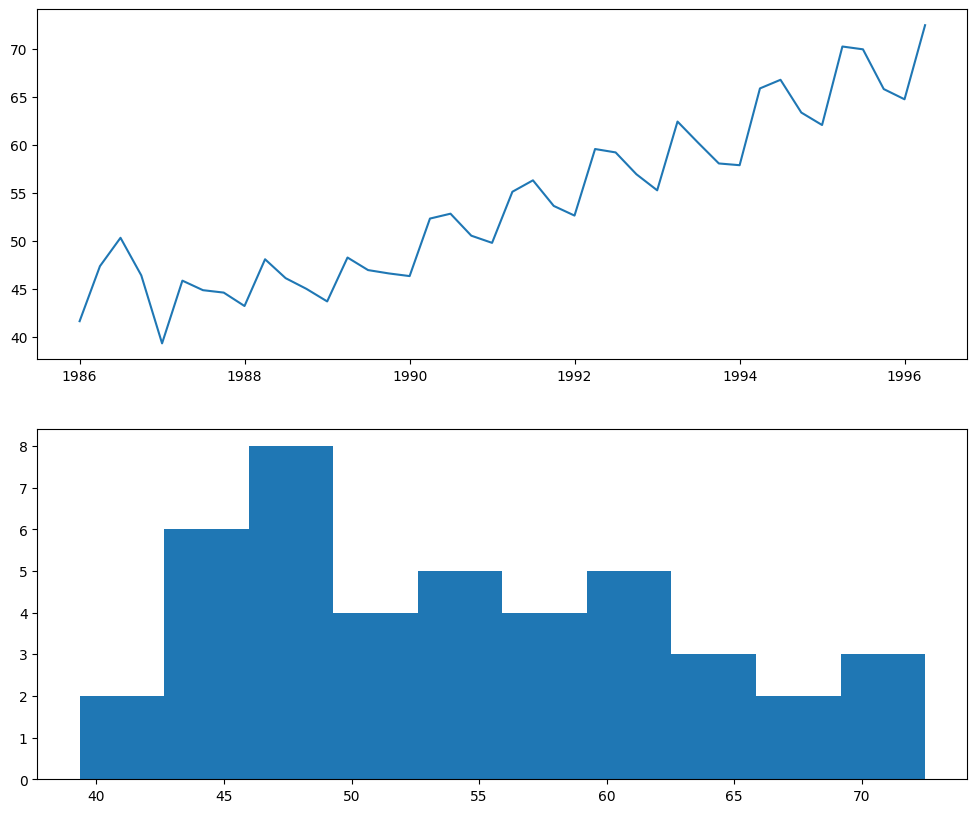

In [768]:
#  square root tranformations


from math import sqrt
square_root= pd.DataFrame()
square_root = data[['Sales']]
square_root['Sales'] = np.sqrt(square_root.Sales)

# line chart
fig=plt.figure(figsize=(12,10))
plt.subplot(211)
plt.plot(square_root['Sales'])

# Histogram
plt.subplot(212)
plt.hist(square_root['Sales'])
plt.show()

# log transform

C:\Users\91863\AppData\Local\Temp\ipykernel_17948\2974710822.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log['Sales'] = np.log(log.Sales)


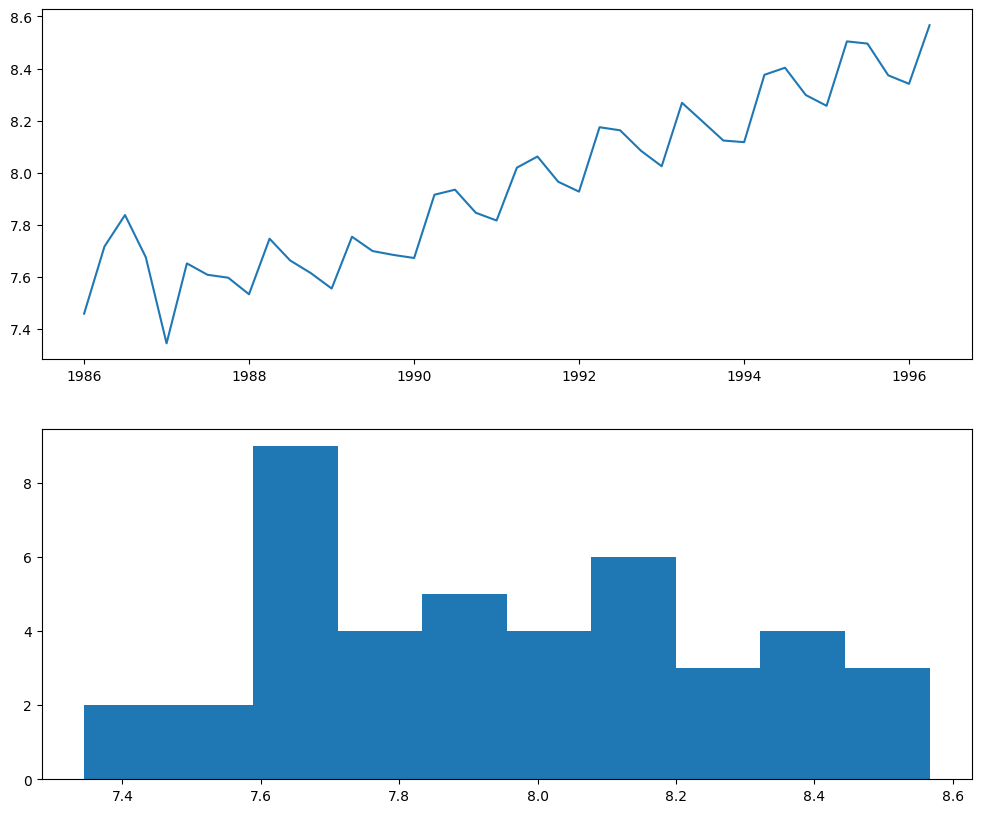

In [769]:
log = pd.DataFrame()
log = data[['Sales']]
log['Sales'] = np.log(log.Sales)

# line chart
fig = plt.figure(figsize=(12,10))
plt.subplot(211)
plt.plot(log['Sales'])

# Histogram
plt.subplot(212)
plt.hist(log['Sales'])
plt.show()

In [770]:
data.head()

,Sales,year,Quarters_Q1,Quarters_Q2,Quarters_Q3,Quarters_Q4,month
Date,,,,,,,
1986-01-01,1734.827000,1986,1,0,0,0,Jan
1986-04-01,2244.960999,1986,0,1,0,0,Apr
1986-07-01,2533.804993,1986,0,0,1,0,Jul
1986-10-01,2154.962997,1986,0,0,0,1,Oct
1987-01-01,1547.818996,1987,1,0,0,0,Jan


<Axes: xlabel='month', ylabel='year'>

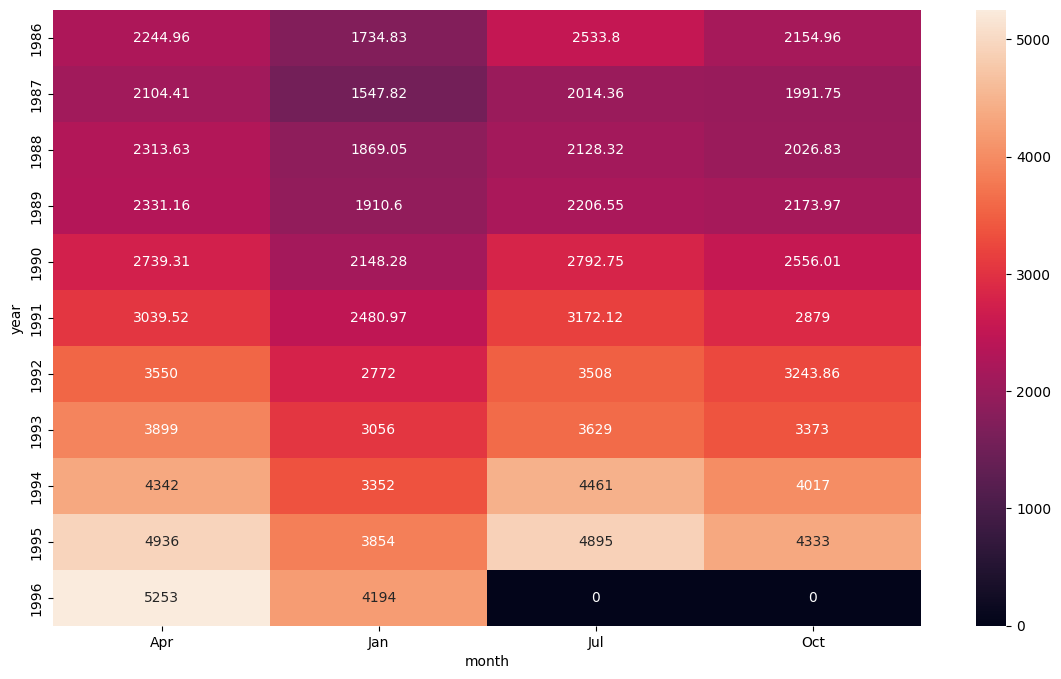

In [771]:
plt.figure(figsize= (14,8))
heatmap_y_month = pd.pivot_table(data=data,values="Sales",index="year",columns = "month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt = "g")  # fmt iss format of the grid vaalues

<Axes: xlabel='year', ylabel='Sales'>

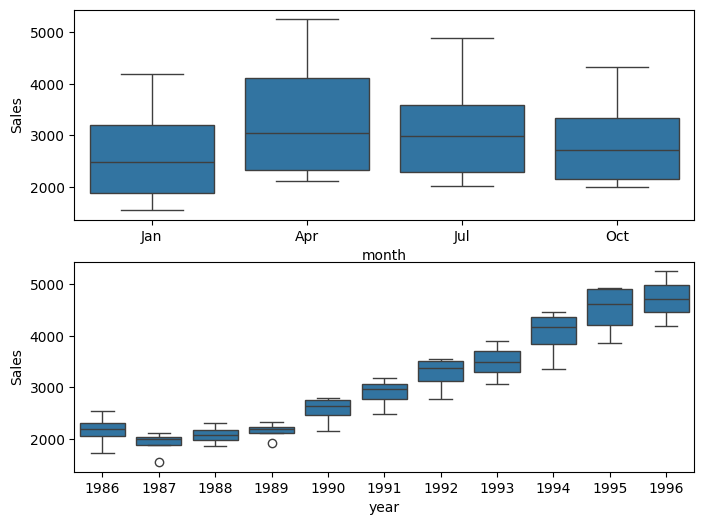

In [772]:

# boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Sales",data=data)
plt.subplot(212)
sns.boxplot(x="year",y="Sales",data=data)

<Axes: xlabel='year', ylabel='Sales'>

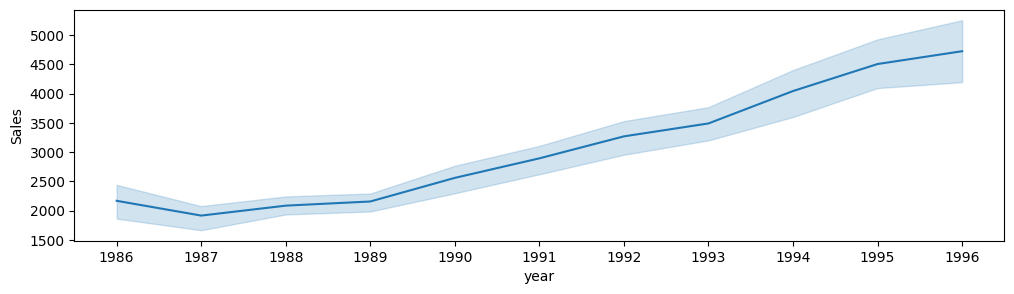

In [773]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Sales",data=data)

# moving average

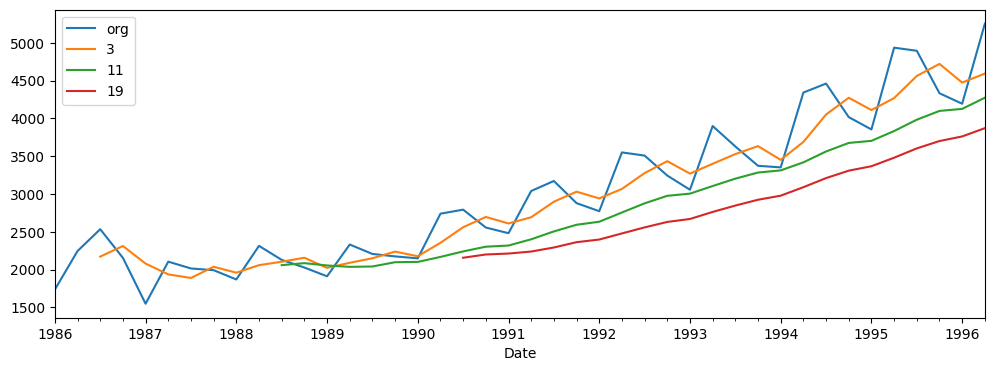

In [774]:
plt.figure(figsize=(12,4))
data.Sales.plot(label = "org")
for i in range(3,24,8):
    data["Sales"].rolling(i).mean().plot(label = str(i))
plt.legend(loc = "best")

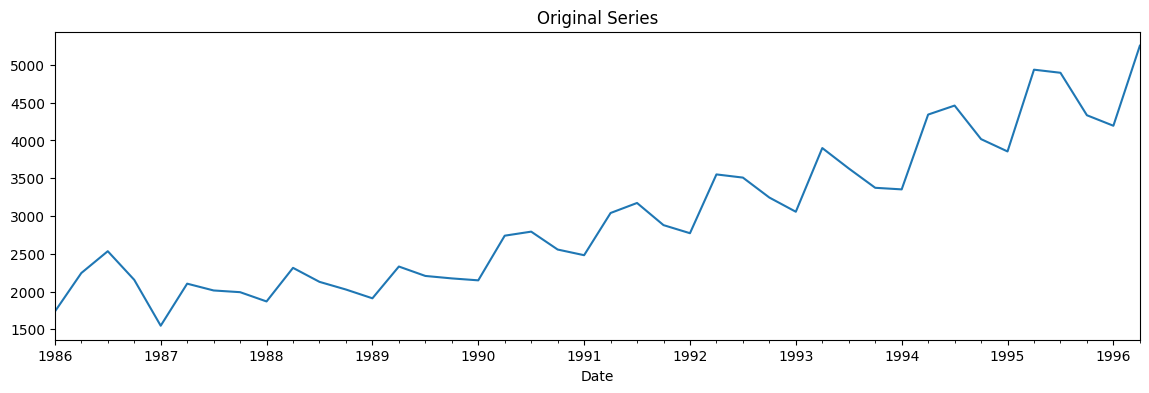

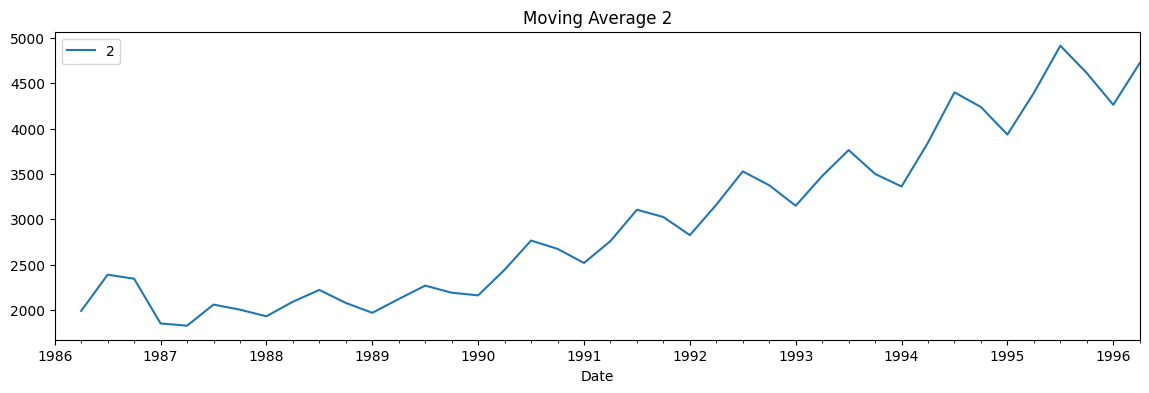

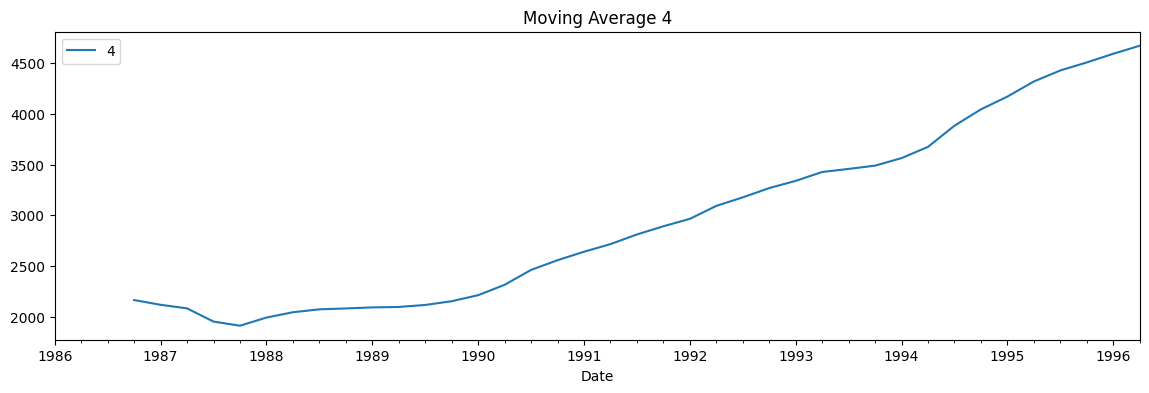

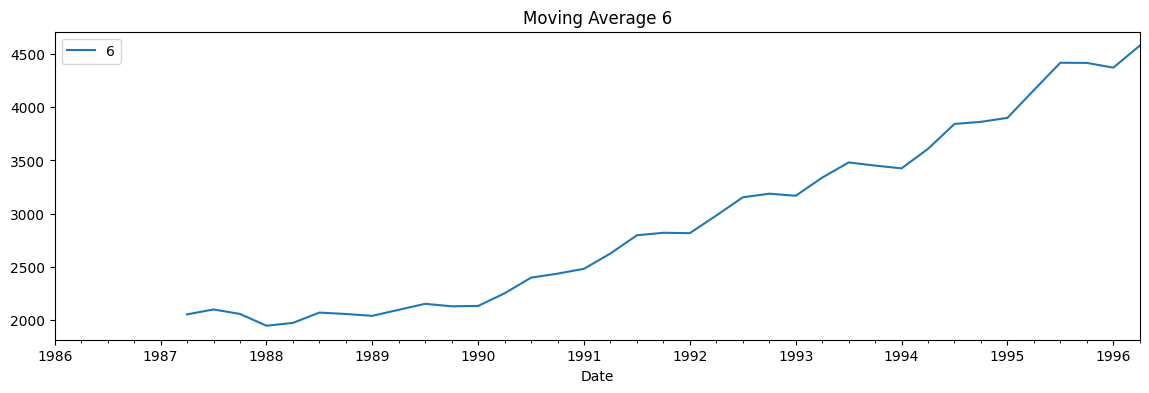

In [775]:
plt.figure(figsize=(14,4))
data.Sales.plot(label="org")
plt.title("Original Series")
for i in range(2,8,2):
    plt.figure(figsize=(14,4))
    data["Sales"].rolling(i).mean().plot(label=str(i))
    plt.title("Moving Average "+str(i))
    plt.legend(loc='best')
    plt.show()

# Time series decomposition plot

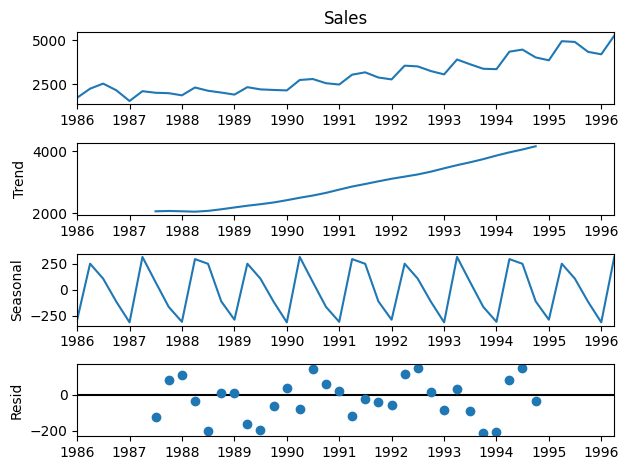

In [776]:
decompose_ts_add = seasonal_decompose(data.Sales,period=12)
decompose_ts_add.plot()
plt.show()

# ACF plots and PACF plots

c:\Users\91863\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


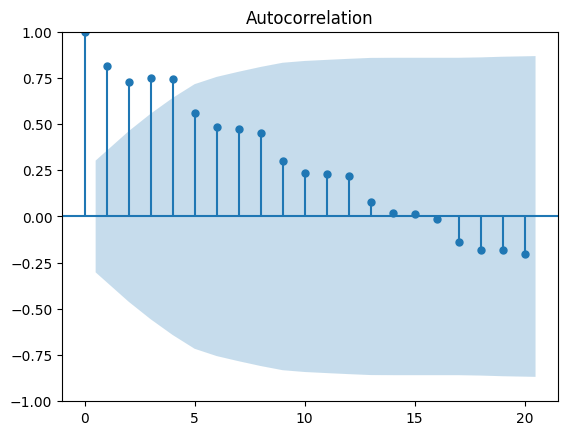

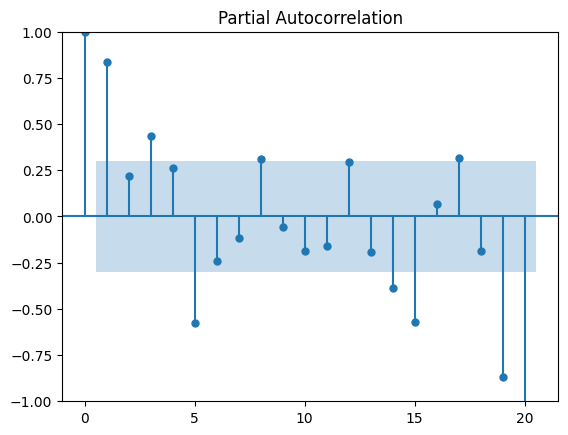

In [777]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data.Sales,lags=20)
tsa_plots.plot_pacf(data.Sales,lags=20)
plt.show()

p=4,q=1

In [778]:
data.shape

(42, 7)

In [779]:
# splitting the data
train = data.head(30)
test = data.tail(12)

# evaluation metrics MAPE

In [780]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

# simple exponential method

In [781]:
ses_model= SimpleExpSmoothing(train["Sales"]).fit(smoothing_level = 0.2)
pred_ses=ses_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_ses,test.Sales)

c:\Users\91863\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


22.046763337847036

# holt method

In [782]:
hw_model = Holt(train["Sales"]).fit(smoothing_level=0.1,smoothing_slope=0.2)
pred_hw=hw_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hw,test.Sales)

c:\Users\91863\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\91863\AppData\Local\Temp\ipykernel_17948\1006829680.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(train["Sales"]).fit(smoothing_level=0.1,smoothing_slope=0.2)


8.498631843608441

# holts winter exponential smoothing with additive seasonality and additive trend

In [783]:
hwe_model_add_add= ExponentialSmoothing(train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2)
pred_hwe_add_add=hwe_model_add_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_add_add,test.Sales)

c:\Users\91863\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\91863\AppData\Local\Temp\ipykernel_17948\2548309898.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hwe_model_add_add= ExponentialSmoothing(train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2)


5.013073026267162

# holts winter exponential smoothing with multiplicative seasonality and additive trend

In [784]:
hwe_model_mul_add= ExponentialSmoothing(train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2)
pred_hwe_mul_add=hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_mul_add,test.Sales)

c:\Users\91863\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\91863\AppData\Local\Temp\ipykernel_17948\3412318531.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hwe_model_mul_add= ExponentialSmoothing(train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2)


3.8660382456515854

# final model by combination train and test

In [785]:
hwe_model_add_add= ExponentialSmoothing(df["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit()

In [786]:
 #forecasting for next 10 time periods

hwe_model_add_add.forecast(10)

1996-05-31    5363.918570
1996-06-30    5517.544748
1996-07-31    5663.016046
1996-08-31    5714.962718
1996-09-30    5780.614509
1996-10-31    5845.922261
1996-11-30    5950.177628
1996-12-31    6012.007227
1997-01-31    6079.007289
1997-02-28    6459.183036
Freq: M, dtype: float64

In [787]:
hwe_model_mul_add= ExponentialSmoothing(df["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit()

In [788]:
 #forecasting for next 10 time periods

hwe_model_mul_add.forecast(10)

1996-05-31    5223.377587
1996-06-30    5196.754964
1996-07-31    5169.490306
1996-08-31    4992.791240
1996-09-30    4812.085186
1996-10-31    4622.807246
1996-11-30    4494.160504
1996-12-31    4345.259925
1997-01-31    4208.172292
1997-02-28    4550.924772
Freq: M, dtype: float64

In [789]:
df

,Sales
Date,
1986-01-31,1734.827000
1986-02-28,1904.871666
1986-03-31,2074.916332
1986-04-30,2244.960999
1986-05-31,2341.242330
...,...
1995-12-31,4240.333333
1996-01-31,4194.000000
1996-02-29,4547.000000


In [790]:
df.reset_index(inplace=True)

In [791]:
df

,Date,Sales
0,1986-01-31,1734.827000
1,1986-02-28,1904.871666
2,1986-03-31,2074.916332
3,1986-04-30,2244.960999
4,1986-05-31,2341.242330
...,...,...
119,1995-12-31,4240.333333
120,1996-01-31,4194.000000
121,1996-02-29,4547.000000
122,1996-03-31,4900.000000


In [792]:
df.drop_duplicates(inplace=True)

In [793]:
df.shape

(124, 2)

In [794]:
df["t"] =1

In [795]:
for i,row in df.iterrows():
  df['t'].iloc[i] = i+1

C:\Users\91863\AppData\Local\Temp\ipykernel_17948\3113747851.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['t'].iloc[i] = i+1


In [796]:
df["t_square"] = (df["t"]**2)

In [797]:
df["month"] = df.Date.dt.strftime("%b") # month extraction
df["year"] = df.Date.dt.strftime("%Y") # year extraction

In [798]:
df.head()

,Date,Sales,t,t_square,month,year
0,1986-01-31,1734.827000,1,1,Jan,1986
1,1986-02-28,1904.871666,2,4,Feb,1986
2,1986-03-31,2074.916332,3,9,Mar,1986
3,1986-04-30,2244.960999,4,16,Apr,1986
4,1986-05-31,2341.242330,5,25,May,1986


In [799]:
months= pd.get_dummies(df["month"])
months

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
119,0,0,1,0,0,0,0,0,0,0,0,0
120,0,0,0,0,1,0,0,0,0,0,0,0
121,0,0,0,1,0,0,0,0,0,0,0,0
122,0,0,0,0,0,0,0,1,0,0,0,0


In [800]:
months = months[["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov"]]

In [801]:
cococola_data = pd.concat([df,months],axis=1)

In [802]:
cococola_data['log_Sales'] = np.log(cococola_data['Sales'])
cococola_data.head()

,Date,Sales,t,t_square,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,log_Sales
0,1986-01-31,1734.827000,1,1,Jan,1986,1,0,0,0,0,0,0,0,0,0,0,7.458663
1,1986-02-28,1904.871666,2,4,Feb,1986,0,1,0,0,0,0,0,0,0,0,0,7.552170
2,1986-03-31,2074.916332,3,9,Mar,1986,0,0,1,0,0,0,0,0,0,0,0,7.637676
3,1986-04-30,2244.960999,4,16,Apr,1986,0,0,0,1,0,0,0,0,0,0,0,7.716443
4,1986-05-31,2341.242330,5,25,May,1986,0,0,0,0,1,0,0,0,0,0,0,7.758437


In [803]:
# splitting data

train =cococola_data.head(112)
test = cococola_data.tail(12)

In [804]:
# linear model
import statsmodels.formula.api as smf
linear_model = smf.ols("Sales~t",data=train).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(test["t"])))
rmse_linear = np.sqrt(np.mean((np.array(test["Sales"])-np.array(pred_linear))**2))
rmse_linear

561.9428078334439

In [805]:
# exponential

exp = smf.ols("log_Sales~t",data=train).fit()
pred_exp = pd.Series(exp.predict(pd.DataFrame(test["t"])))
rmse_exp = np.sqrt(np.mean((np.array(test["Sales"])-np.array(np.exp(pred_exp)))**2))
rmse_exp  # error is more than linear

432.87831178706824

In [806]:
# quadratic
quad = smf.ols("Sales~t+t_square",data=train).fit()
pred_quad = pd.Series(quad.predict(test[["t","t_square"]]))
rmse_quad= np.sqrt(np.mean((np.array(test["Sales"])-np.array(pred_quad))**2))
rmse_quad 

416.124047362575

In [807]:
# additve seasonality
add_sea = smf.ols("Sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov",data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(test[["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov"]]))
rmse_add_sea= np.sqrt(np.mean((np.array(test["Sales"])-np.array(pred_add_sea))**2))
rmse_add_sea

1840.3042900245857

In [808]:
# additve  quadratic seasonality
add_sea_quad = smf.ols("Sales~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov",data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_quad.predict(test))
rmse_add_sea_quad= np.sqrt(np.mean((np.array(test["Sales"])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

271.9062333128679

In [809]:
# multi seasonality

mul_sea = smf.ols("log_Sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov",data=train).fit()
pred_mul_sea = pd.Series(mul_sea.predict(test))
rmse_mul_sea= np.sqrt(np.mean((np.array(test["Sales"])-np.array(np.exp(pred_mul_sea)))**2))
rmse_mul_sea

1939.082378199315

In [810]:
# mutliplicative additve seasonality
mul_add_sea = smf.ols("log_Sales~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov",data=train).fit()
pred_mul_add_sea = pd.Series(mul_add_sea.predict(test))
rmse_mul_add_sea= np.sqrt(np.mean((np.array(test["Sales"])-np.array(np.exp(pred_mul_add_sea)))**2))
rmse_mul_add_sea

236.2636402038069

In [811]:
# compare theresults
dataframe= {"Model":pd.Series(["rmse_linear","rmse_exp","rmse_quad","rmse_add_sea","rmse_add_sea_quad","rmse_mul_sea","rmse_mul_add_sea"]),"RMSE_Values": [rmse_linear,rmse_exp,rmse_quad,rmse_add_sea,rmse_add_sea_quad,rmse_mul_sea,rmse_mul_add_sea]}
table_rmse = pd.DataFrame(dataframe)

table_rmse.sort_values(["RMSE_Values"])

,Model,RMSE_Values
6,rmse_mul_add_sea,236.263640
4,rmse_add_sea_quad,271.906233
2,rmse_quad,416.124047
1,rmse_exp,432.878312
0,rmse_linear,561.942808
3,rmse_add_sea,1840.304290
5,rmse_mul_sea,1939.082378


  ** therfore , the best model with the lowest rmse is multiplicative and additive seasonality one with 236.26. so , that is theb est model i have got